# Inference Notebook

Use this notebook to run inference using a pretrained model.

In [1]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 60.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip


In [2]:
!pip install wandb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 69.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.6/207.6 kB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 117.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.7/431.7 kB 143.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 298.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.8/325.8 kB 109.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 26.2 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_extensions-4.4.0:
      Successfully uninstalled typing_extensions-4.4.0

[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip


In [3]:
#!pip install monai

In [4]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 969.2 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.1/80.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup

In [5]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, log_loss
import pickle
from torch.utils.data import DataLoader
from torch.cuda.amp import autocast, GradScaler
import warnings
import sys
import pandas as pd
import os
import gc
import sys
import math
import time
import random
import shutil
from pathlib import Path
from contextlib import contextmanager
from collections import defaultdict, Counter
import cv2

import scipy as sp
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from functools import partial

from PIL import Image

import argparse
import importlib
import torch
import torch.nn as nn
from torch.optim import Adam, SGD, AdamW

import datetime
# import wandb

In [6]:
# !pip install /kaggle/input/einops/einops-0.6.1-py3-none-any.whl
# !pip install /kaggle/input/monai-packages/monai-1.1.0-202212191849-py3-none-any.whl["einops"]

To get the folders necessary for the path appends below, check the README for instructions.

See the part that says  
`!cd /root && git clone git@github.com:wolny/pytorch-3dunet.git && cd pytorch-3dunet && pip install -e .` You just need to grab the `get_model` function from this repo and grab the model directly.

In this inference notebook we originally manually added the paths to `segmentation-models-pytorch`, `timm-pytorch-image-models`, `efficientnet-pytorch`, and `pretrainedmodels`, as well as the 3d-unet. On the actual notebook we submitted, we put the models on the github links above into the kaggle datasets below:

https://www.kaggle.com/datasets/ryches/einops  
https://www.kaggle.com/datasets/ryches/3d-unet  
https://www.kaggle.com/datasets/ryches/unet3d  

Here are the links to the other repos. You likely won't have to install these manually as they're included in `requirements.txt`. We're including links anyway in case you have to go that route. Make sure to edit the `sys.path.append` calls below to include if you're grabbing these manually (if you can import as-is, feel free to comment out the `sys.path.append`s)

https://github.com/qubvel/segmentation_models.pytorch  
https://timm.fast.ai/  
https://github.com/lukemelas/EfficientNet-PyTorch

The `pretrainedmodels` folder contains the weights we created during training.
You might have to do a bit of manual massaging to get all the imports you need.

In [7]:
sys.path.append('externals')


# sys.path.append('/kaggle/input/pretrainedmodels/pretrainedmodels-0.7.4')
# sys.path.append('/kaggle/input/efficientnet-pytorch/EfficientNet-PyTorch-master')
# sys.path.append('/kaggle/input/timm-pytorch-image-models/pytorch-image-models-master')
# sys.path.append('/kaggle/input/segmentation-models-pytorch/segmentation_models.pytorch-master')
# sys.path.append('/kaggle/input/unet3d/pytorch3dunet/pytorch3dunet')
# sys.path.append('/kaggle/input/unet3d/pytorch3dunet')
# sys.path.append('/kaggle/input/unet3d/')

import segmentation_models_pytorch as smpx
from pytorch3dunet.unet3d.model import get_model
from unetr import UNETR

In [8]:
import numpy as np
from torch.utils.data import DataLoader, Dataset
import cv2
import torch
import os
import albumentations as A
from albumentations.pytorch import ToTensorV2
from albumentations import ImageOnlyTransform

## config

In [9]:
import os
import albumentations as A
from albumentations.pytorch import ToTensorV2

class CFG:
    # ============== comp exp name =============
    comp_name = 'vesuvius'

    # comp_dir_path = './'
    comp_dir_path = '/workspace/input/'
    comp_folder_name = 'vesuvius-challenge-ink-detection'
    # comp_dataset_path = f'{comp_dir_path}datasets/{comp_folder_name}/'
    comp_dataset_path = f'{comp_dir_path}{comp_folder_name}/'
    
    exp_name = '3d_unet_subv2'

    # ============== pred target =============
    target_size = 1

    # ============== model cfg =============
    model_name = '3d_unet_segformer'
    backbone = 'None'
#     backbone = 'se_resnext50_32x4d'

    in_chans = 16
    # ============== training cfg =============
    size = 1024
    tile_size = 1024
    stride = tile_size // 1

    batch_size = 3 # 32
    use_amp = True

    scheduler = 'GradualWarmupSchedulerV2'
    # scheduler = 'CosineAnnealingLR'
    epochs = 15

    warmup_factor = 10
    lr = 1e-4 / warmup_factor

    # ============== fold =============
    valid_id = 2

    objective_cv = 'binary'  # 'binary', 'multiclass', 'regression'
    metric_direction = 'maximize'  # maximize, 'minimize'
    # metrics = 'dice_coef'

    # ============== fixed =============
    pretrained = True
    inf_weight = 'best'  # 'best'

    min_lr = 1e-6
    weight_decay = 1e-6
    max_grad_norm = 1000

    print_freq = 50
    num_workers = 2

    seed = 42

    # ============== augmentation =============
    train_aug_list = [
        # A.RandomResizedCrop(
        #     size, size, scale=(0.85, 1.0)),
        A.Resize(size, size),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.75),
        A.ShiftScaleRotate(p=0.75),
        A.OneOf([
                A.GaussNoise(var_limit=[10, 50]),
                A.GaussianBlur(),
                A.MotionBlur(),
                ], p=0.4),
        A.GridDistortion(num_steps=5, distort_limit=0.3, p=0.5),
        A.CoarseDropout(max_holes=1, max_width=int(size * 0.3), max_height=int(size * 0.3), 
                        mask_fill_value=0, p=0.5),
        # A.Cutout(max_h_size=int(size * 0.6),
        #          max_w_size=int(size * 0.6), num_holes=1, p=1.0),
        A.Normalize(
            mean= [0] * in_chans,
            std= [1] * in_chans
        ),
        ToTensorV2(transpose_mask=True),
    ]

    valid_aug_list = [
        A.Resize(size, size),
        A.Normalize(
            mean= [0] * in_chans,
            std= [1] * in_chans
        ),
        ToTensorV2(transpose_mask=True),
    ]


/usr/local/lib/python3.10/dist-packages/albumentations/core/validation.py:58: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
/tmp/ipykernel_167/595736528.py:71: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=[10, 50]),
/tmp/ipykernel_167/595736528.py:76: UserWarning: Argument(s) 'max_holes, max_width, max_height, mask_fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=1, max_width=int(size * 0.3), max_height=int(size * 0.3),


In [10]:
IS_DEBUG = False
mode = 'train' if IS_DEBUG else 'test'
TH = 0.5

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## helper

In [12]:
# ref.: https://www.kaggle.com/stainsby/fast-tested-rle
def rle(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = img.flatten()
    # pixels = (pixels >= thr).astype(int)
    
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

## dataset

In [57]:
def read_image(fragment_id):
    images = []

#     idxs = range(65)
    mid = 65 // 2
    start = mid - CFG.in_chans // 2
    end = mid + CFG.in_chans // 2
    idxs = range(start, end)

    path = CFG.comp_dataset_path + f"{mode}/{fragment_id}/surface_volume/"
    if os.path.exists(f"{path}/00.jpg"):
        ext = "jpg"
    else:
        ext = "tif"

    for i in tqdm(idxs):
        
        image = cv2.imread(f"{path}{i:02}.{ext}", 0)

        pad0 = (CFG.tile_size - image.shape[0] % CFG.tile_size)
        pad1 = (CFG.tile_size - image.shape[1] % CFG.tile_size)

        image = np.pad(image, [(0, pad0), (0, pad1)], constant_values=0)

        images.append(image)
    images = np.stack(images, axis=2)
    
    return images

In [14]:
def get_transforms(data, cfg):
    if data == 'train':
        aug = A.Compose(cfg.train_aug_list)
    elif data == 'valid':
        aug = A.Compose(cfg.valid_aug_list)

    # print(aug)
    return aug

class CustomDataset(Dataset):
    def __init__(self, images, cfg, labels=None, transform=None):
        self.images = np.array(images)
        self.cfg = cfg
        self.labels = labels
        self.transform = transform

    def __len__(self):
        # return len(self.xyxys)
        return len(self.images)

    def __getitem__(self, idx):
        image = np.load(self.images[idx])
        data = self.transform(image=image)
        image = data['image']
        return image[None, :, :, :]


In [15]:
def make_test_dataset(fragment_id):
    test_images = read_image(fragment_id)
    
    x1_list = list(range(0, test_images.shape[1]-CFG.tile_size+1, CFG.stride))
    y1_list = list(range(0, test_images.shape[0]-CFG.tile_size+1, CFG.stride))
    
    test_images_list = []
    xyxys = []
    for y1 in tqdm(y1_list):
        for x1 in x1_list:
            y2 = y1 + CFG.tile_size
            x2 = x1 + CFG.tile_size
            if test_images[y1:y2, x1:x2].max() != 0:
                chunk = f"chunks/{fragment_id}/{x1}_{y1}_{x2}_{y2}.npy"
                if not os.path.exists(chunk):
                    np.save(chunk, test_images[y1:y2, x1:x2])
                test_images_list.append(chunk)
                xyxys.append((x1, y1, x2, y2))
    del test_images
    gc.collect()
    xyxys = np.stack(xyxys)
            
    test_dataset = CustomDataset(test_images_list, CFG, transform=get_transforms(data='valid', cfg=CFG))
    
    test_loader = DataLoader(test_dataset,
                          batch_size=CFG.batch_size,
                          shuffle=False,
                          num_workers=CFG.num_workers, pin_memory=True, drop_last=False)
    
    return test_loader, xyxys

## model

Below we define the configs for different models we used in the eventual ensemble. We changed which models we actually included depending on the submission.

In [16]:
from transformers import SegformerForSemanticSegmentation, SegformerModel, SegformerConfig

In [17]:
cnn_3d_segformer_b1_config = SegformerConfig(**{
  "architectures": [
    "SegformerForImageClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "classifier_dropout_prob": 0.1,
  "decoder_hidden_size": 256,
  "depths": [
    2,
    2,
    2,
    2
  ],
  "downsampling_rates": [
    1,
    4,
    8,
    16
  ],
  "drop_path_rate": 0.1,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_sizes": [
    64,
    128,
    320,
    512
  ],
  "image_size": 224,
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-06,
  "mlp_ratios": [
    4,
    4,
    4,
    4
  ],
  "model_type": "segformer",
  "num_attention_heads": [
    1,
    2,
    5,
    8
  ],
  "num_channels": 32,
  "num_encoder_blocks": 4,
  "patch_sizes": [
    7,
    3,
    3,
    3
  ],
  "sr_ratios": [
    8,
    4,
    2,
    1
  ],
  "strides": [
    4,
    2,
    2,
    2
  ],
  "torch_dtype": "float32",
  "transformers_version": "4.12.0.dev0",
  "num_labels":1,
})

In [18]:
cnn_3d_segformer_b2_config = SegformerConfig(**{
  "architectures": [
    "SegformerForImageClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "classifier_dropout_prob": 0.1,
  "decoder_hidden_size": 768,
  "depths": [
    3,
    4,
    6,
    3
  ],
  "downsampling_rates": [
    1,
    4,
    8,
    16
  ],
  "drop_path_rate": 0.1,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_sizes": [
    64,
    128,
    320,
    512
  ],
  "image_size": 224,
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-06,
  "mlp_ratios": [
    4,
    4,
    4,
    4
  ],
  "model_type": "segformer",
  "num_attention_heads": [
    1,
    2,
    5,
    8
  ],
  "num_channels": 32,
  "num_encoder_blocks": 4,
  "patch_sizes": [
    7,
    3,
    3,
    3
  ],
  "sr_ratios": [
    8,
    4,
    2,
    1
  ],
  "strides": [
    4,
    2,
    2,
    2
  ],
  "torch_dtype": "float32",
  "transformers_version": "4.12.0.dev0",
  "num_labels":1
})

In [19]:
cnn_3d_segformer_b4_config = SegformerConfig(**{
  "architectures": [
    "SegformerForImageClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "classifier_dropout_prob": 0.1,
  "decoder_hidden_size": 768,
  "depths": [
    3,
    8,
    27,
    3
  ],
  "downsampling_rates": [
    1,
    4,
    8,
    16
  ],
  "drop_path_rate": 0.1,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_sizes": [
    64,
    128,
    320,
    512
  ],
  "image_size": 224,
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-06,
  "mlp_ratios": [
    4,
    4,
    4,
    4
  ],
  "model_type": "segformer",
  "num_attention_heads": [
    1,
    2,
    5,
    8
  ],
  "num_channels": 32,
  "num_encoder_blocks": 4,
  "patch_sizes": [
    7,
    3,
    3,
    3
  ],
  "sr_ratios": [
    8,
    4,
    2,
    1
  ],
  "strides": [
    4,
    2,
    2,
    2
  ],
  "torch_dtype": "float32",
  "transformers_version": "4.12.0.dev0",
  "num_labels":1
})

In [20]:
cnn_3d_segformer_b5_config = SegformerConfig(**{
  "architectures": [
    "SegformerForImageClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "classifier_dropout_prob": 0.1,
  "decoder_hidden_size": 768,
  "depths": [
    3,
    6,
    40,
    3
  ],
  "downsampling_rates": [
    1,
    4,
    8,
    16
  ],
  "drop_path_rate": 0.1,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_sizes": [
    64,
    128,
    320,
    512
  ],
  "image_size": 224,
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-06,
  "mlp_ratios": [
    4,
    4,
    4,
    4
  ],
  "model_type": "segformer",
  "num_attention_heads": [
    1,
    2,
    5,
    8
  ],
  "num_channels": 32,
  "num_encoder_blocks": 4,
  "patch_sizes": [
    7,
    3,
    3,
    3
  ],
  "sr_ratios": [
    8,
    4,
    2,
    1
  ],
  "strides": [
    4,
    2,
    2,
    2
  ],
  "torch_dtype": "float32",
  "transformers_version": "4.12.0.dev0",
  "num_labels":1
})

In [21]:
cnn_3d_config = SegformerConfig(**{
  "architectures": [
    "SegformerForImageClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "classifier_dropout_prob": 0.1,
  "decoder_hidden_size": 768,
  "depths": [
    3,
    4,
    18,
    3
  ],
  "downsampling_rates": [
    1,
    4,
    8,
    16
  ],
  "drop_path_rate": 0.1,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_sizes": [
    64,
    128,
    320,
    512
  ],

  "image_size": 224,
  "initializer_range": 0.02,
  
  "layer_norm_eps": 1e-06,
  "mlp_ratios": [
    4,
    4,
    4,
    4
  ],
  "model_type": "segformer",
  "num_attention_heads": [
    1,
    2,
    5,
    8
  ],
  "num_encoder_blocks": 4,
  "patch_sizes": [
    7,
    3,
    3,
    3
  ],
  "sr_ratios": [
    8,
    4,
    2,
    1
  ],
  "strides": [
    4,
    2,
    2,
    2
  ],
  "torch_dtype": "float32",
  "num_labels":1,
  "num_channels":32})
cnn_3d_more_filters_config = SegformerConfig(**{
  "architectures": [
    "SegformerForImageClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "classifier_dropout_prob": 0.1,
  "decoder_hidden_size": 768,
  "depths": [
    3,
    4,
    18,
    3
  ],
  "downsampling_rates": [
    1,
    4,
    8,
    16
  ],
  "drop_path_rate": 0.1,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_sizes": [
    64,
    128,
    320,
    512
  ],

  "image_size": 224,
  "initializer_range": 0.02,
  
  "layer_norm_eps": 1e-06,
  "mlp_ratios": [
    4,
    4,
    4,
    4
  ],
  "model_type": "segformer",
  "num_attention_heads": [
    1,
    2,
    5,
    8
  ],
  "num_encoder_blocks": 4,
  "patch_sizes": [
    7,
    3,
    3,
    3
  ],
  "sr_ratios": [
    8,
    4,
    2,
    1
  ],
  "strides": [
    4,
    2,
    2,
    2
  ],
  "torch_dtype": "float32",
  "num_labels":1,
  "num_channels":64})

unet_3d_config = SegformerConfig(**{
  "architectures": [
    "SegformerForImageClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "classifier_dropout_prob": 0.1,
  "decoder_hidden_size": 768,
  "depths": [
    3,
    4,
    18,
    3
  ],
  "downsampling_rates": [
    1,
    4,
    8,
    16
  ],
  "drop_path_rate": 0.1,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_sizes": [
    64,
    128,
    320,
    512
  ],

  "image_size": 224,
  "initializer_range": 0.02,
  
  "layer_norm_eps": 1e-06,
  "mlp_ratios": [
    4,
    4,
    4,
    4
  ],
  "model_type": "segformer",
  "num_attention_heads": [
    1,
    2,
    5,
    8
  ],
  "num_channels": 3,
  "num_encoder_blocks": 4,
  "patch_sizes": [
    7,
    3,
    3,
    3
  ],
  "sr_ratios": [
    8,
    4,
    2,
    1
  ],
  "strides": [
    4,
    2,
    2,
    2
  ],
  "torch_dtype": "float32",
  "num_labels":1,
  "num_channels":16})

In [22]:
unet_3d_jumbo_config = SegformerConfig(**{
  "architectures": [
    "SegformerForImageClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "classifier_dropout_prob": 0.1,
  "decoder_hidden_size": 768,
  "depths": [
    3,
    6,
    40,
    3
  ],
  "downsampling_rates": [
    1,
    4,
    8,
    16
  ],
  "drop_path_rate": 0.1,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_sizes": [
    64,
    128,
    320,
    512
  ],
  "image_size": 224,
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-06,
  "mlp_ratios": [
    4,
    4,
    4,
    4
  ],
  "model_type": "segformer",
  "num_attention_heads": [
    1,
    2,
    5,
    8
  ],
  "num_channels": 32,
  "num_encoder_blocks": 4,
  "patch_sizes": [
    7,
    3,
    3,
    3
  ],
  "sr_ratios": [
    8,
    4,
    2,
    1
  ],
  "strides": [
    4,
    2,
    2,
    2
  ],
  "torch_dtype": "float32",
  "transformers_version": "4.12.0.dev0",
  "num_labels":1
})

unetr_multiclass_config = SegformerConfig(**{
  "architectures": [
    "SegformerForImageClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "classifier_dropout_prob": 0.1,
  "decoder_hidden_size": 768,
  "depths": [
    3,
    6,
    40,
    3
  ],
  "downsampling_rates": [
    1,
    4,
    8,
    16
  ],
  "drop_path_rate": 0.1,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_sizes": [
    64,
    128,
    320,
    512
  ],
  "image_size": 224,
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-06,
  "mlp_ratios": [
    4,
    4,
    4,
    4
  ],
  "model_type": "segformer",
  "num_attention_heads": [
    1,
    2,
    5,
    8
  ],
  "num_channels": 32,
  "num_encoder_blocks": 4,
  "patch_sizes": [
    7,
    3,
    3,
    3
  ],
  "sr_ratios": [
    8,
    4,
    2,
    1
  ],
  "strides": [
    4,
    2,
    2,
    2
  ],
  "torch_dtype": "float32",
  "transformers_version": "4.12.0.dev0",
  "num_labels":3
})

In [23]:
from unetr import UNETR
from externals.models import cnn3d_segformer, cnn3d_segformer_more_filters, unet3d_segformer, unet3d_segformer_jumbo, UNETR_Segformer, UNETR_SegformerMC
# from externals.models import CNN3D_Segformer, Unet3D_Segformer, CNN3D_Unet, CNN3D_MANet, CNN3D_EfficientUnetplusplusb5, CNN3D_SegformerB4

def build_model(cfg, model_arch = None):
    print('model_name', cfg.model_name)
    if model_arch == "cnn3d":
        model = cnn3d_segformer(cfg)
    if model_arch == "cnn3d_more_filters":
        model = cnn3d_segformer_more_filters(cfg)
    if model_arch == "unet3d":
        model = unet3d_segformer(cfg)
    if model_arch == "unet3d_jumbo":
        model = unet3d_segformer_jumbo(cfg)
    if model_arch == "unetr":
        model = UNETR_Segformer(cfg)
    if model_arch == "unetr_mc":
        model = UNETR_SegformerMC(cfg)

    return model

In [24]:
class EnsembleModel:
    def __init__(self, use_tta=False):
        self.models = []
        self.use_tta = use_tta
    def tta_infer(self, model:nn.Module, x):
        #x.shape=(batch,c,h,w)
        shape=x.shape
        x=[x,*[torch.rot90(x,k=i,dims=(-2,-1)) for i in range(1,4)]]
        x=[model(single_x) for single_x in x]
        x=torch.cat(x,dim=0)
        x=x.reshape(4,shape[0],*shape[3:])
        x=[torch.rot90(x[i],k=-i,dims=(-2,-1)) for i in range(4)]
        x=torch.stack(x,dim=0)
        return x.mean(0)
                
    def __call__(self, x):
        if self.use_tta:
            outputs = [self.tta_infer(model, x).to('cpu').numpy()
                   for model in self.models]
        else:
            outputs = [model(x).mean(axis = 1).to('cpu').numpy()
                       for model in self.models]
        avg_preds = np.mean(outputs, axis=0)
        return avg_preds

    def add_model(self, model):
        self.models.append(model)

def build_ensemble_model(model_path, model_arch):
    model = EnsembleModel(use_tta = True)
    _model = build_model(CFG, model_arch)
    _model.to(device)
    state = torch.load(model_path)
    try:
        _model.load_state_dict(state)
    except:
        _model = nn.DataParallel(_model)
        _model.load_state_dict(state)
    _model.eval()

    model.add_model(_model)
    
    return model

Make sure you have the folders with fragment IDs added here.

In [54]:
if mode == 'test':
    fragment_ids = sorted(os.listdir(CFG.comp_dataset_path + mode))
else:
    fragment_ids = [3]

## Select models you want to use here

We just commented/uncommented this list for models we trained when we did inference. You'll need pretrained weights / pretrained models here from training.

In [49]:
model_tuples = [
#     {"model_arch": "cnn3d", "tile_size": 1024, "size": 1024, "batch_size": 3,
#      "weight_path": "/kaggle/input/3d-unet/3dcnn_segformer_1024_3dcnn_segformer_best.pth", "segformer_config": cnn_3d_config, "score": .75},
#    {"model_arch": "unet3d", "tile_size": 1024, "size": 1024, "batch_size": 1,
#     "weight_path": "/kaggle/input/3d-unet/3d_unet_segformer_1024_3d_unet_segformer_final_all_train.pth", "segformer_config": unet_3d_config, "score":.78},
    {"model_arch": "unet3d", "tile_size": 512, "size": 512, "batch_size": 4,
    "weight_path": "/workspace/input/3d-unet/3d_unet_segformer_512_3d_unet_segformer_final.pth", "segformer_config": unet_3d_config, "score":.77},
#     {"model_arch": "cnn3d", "tile_size": 1024, "size": 1024, "batch_size": 3,
#      "weight_path": "/kaggle/input/3d-unet/3dcnn_segformer_1024_full_train_3dcnn_segformer_final.pth", "segformer_config": cnn_3d_config, "score":.76},
#     {"model_arch": "cnn3d", "tile_size": 1024, "size": 1024, "batch_size": 3,
#      "weight_path": "/kaggle/input/3d-unet/3dcnn_segformer_1024_swa_slow_3dcnn_segformer_final_swa.pth", "segformer_config": cnn_3d_config, "score".74},
#     {"model_arch": "unet3d", "tile_size": 1024, "size": 1024, "batch_size": 1,
#      "weight_path": "/kaggle/input/3d-unet/3dunet_segformer_1024_swa_slow_3dunet_segformer_final_swa.pth", "segformer_config": unet_3d_config, "score":.75},
#    {"model_arch": "unet3d", "tile_size": 1024, "size": 1024, "batch_size": 1,
#     "weight_path": "/kaggle/input/3d-unet/3dunet_segformer_1024_swa_slow_all_train_3dunet_segformer_final.pth", "segformer_config": unet_3d_config, "score":.78},
#     {"model_arch": "cnn3d", "tile_size": 1024, "size": 1024, "batch_size": 3,
#      "weight_path": "/kaggle/input/3d-unet/3dcnn_segformer_all_train_swa_3dcnn_segformer_10_final.pth", "segformer_config": cnn_3d_config, "score":.76},
#     {"model_arch": "cnn3d", "tile_size": 1024, "size": 1024, "batch_size": 3,
#      "weight_path": "/kaggle/input/3d-unet/3dcnn_segformer_all_train_swa_3dcnn_segformer_15_final.pth", "segformer_config": cnn_3d_config, "score":.76},
#     {"model_arch": "cnn3d", "tile_size": 1024, "size": 1024, "batch_size": 3,
#      "weight_path": "/kaggle/input/3d-unet/3dcnn_segformer_all_train_swa_3dcnn_segformer_20_final.pth", "segformer_config": cnn_3d_config, "score":.77},
#     {"model_arch": "cnn3d", "tile_size": 1024, "size": 1024, "batch_size": 3,
#      "weight_path": "/kaggle/input/3d-unet/3dcnn_segformer_all_train_swa_3dcnn_segformer_25_final.pth", "segformer_config": cnn_3d_config},
#    {"model_arch": "cnn3d", "tile_size": 1024, "size": 1024, "batch_size": 3,
#     "weight_path": "/kaggle/input/3d-unet/3dcnn_segformer_all_train_swa_3dcnn_segformer_final_swa.pth", "segformer_config": cnn_3d_config, "score":.78},
#     {"model_arch": "cnn3d", "tile_size": 1024, "size": 1024, "batch_size": 5,
#      "weight_path": "/kaggle/input/3d-unet/b1_3dcnn_segformer_b1_final_swa.pth", "segformer_config": cnn_3d_segformer_b1_config, "score":.71},
#     {"model_arch": "cnn3d", "tile_size": 1024, "size": 1024, "batch_size": 4,
#      "weight_path": "/kaggle/input/3d-unet/b2_3dcnn_segformer_b2_final_swa.pth", "segformer_config": cnn_3d_segformer_b2_config, "score":.68},
#     {"model_arch": "cnn3d", "tile_size": 1024, "size": 1024, "batch_size": 2,
#      "weight_path": "/kaggle/input/3d-unet/3dcnn_segformer_b4_3dcnn_segformer_b4_final_swa.pth", "segformer_config": cnn_3d_segformer_b4_config, "score":.74},
#     {"model_arch": "cnn3d", "tile_size": 1024, "size": 1024, "batch_size": 1,
#      "weight_path": "/kaggle/input/3d-unet/3dcnn_bigsegformer_3dcnn_bigsegformer_final.pth", "segformer_config": cnn_3d_segformer_b5_config, "score":.76},
#    {"model_arch": "cnn3d", "tile_size": 1024, "size": 1024, "batch_size": 2,
#     "weight_path": "/kaggle/input/3d-unet/b5_long_train_all_frags_3dcnn_segformer_b5_final_swa.pth", "segformer_config": cnn_3d_segformer_b5_config, "score": .77},
#     {"model_arch": "cnn3d", "tile_size": 1024, "size": 1024, "batch_size": 1,
#      "weight_path": "/kaggle/input/3d-unet/b5_long_train_all_frags_3dcnn_segformer_b5_10_final.pth", "segformer_config": cnn_3d_segformer_b5_config, "score": .74},
#     {"model_arch": "cnn3d", "tile_size": 1024, "size": 1024, "batch_size": 1,
#      "weight_path": "/kaggle/input/3d-unet/b5_long_train_all_frags_3dcnn_segformer_b5_30_final.pth", "segformer_config": cnn_3d_segformer_b5_config, "score":.76},
#     {"model_arch": "cnn3d_more_filters", "tile_size": 1024, "size": 1024, "batch_size": 1,
#      "weight_path": "/kaggle/input/3d-unet/b3_more_fmaps_3dcnn_segformerb364_final_swa.pth", "segformer_config": cnn_3d_more_filters_config, "score": .74},
    {"model_arch": "cnn3d_more_filters", "tile_size": 1024, "size": 1024, "batch_size": 2,
     "weight_path": "/workspace/input/3d-unet/b3_more_fmaps_all_train_3dcnn_segformerb364_final_swa.pth", "segformer_config": cnn_3d_more_filters_config, "score":.78},
#     {"model_arch": "unet3d", "tile_size": 1024, "size": 1024, "batch_size": 1,
#      "weight_path": "/kaggle/input/3d-unet/3d_unet_3dunet_b3_final_swa.pth", "segformer_config": unet_3d_config, "score":.73},
#     {"model_arch": "unet3d", "tile_size": 1024, "size": 1024, "batch_size": 1,
#      "weight_path": "/kaggle/input/3d-unet/3d_unet_all_train_3dunet_b3_final_swa.pth", "segformer_config": unet_3d_config, "score":.76},
#     {"model_arch": "cnn3d", "tile_size": 512, "size": 512, "batch_size": 4,
#      "weight_path": "/kaggle/input/3d-unet/3dcnn_512_b2_all_train_3dcnn_b2_final_swa.pth", "segformer_config": cnn_3d_segformer_b2_config},
    # ran at wrong resolution. Scored .73
#     {"model_arch": "cnn3d", "tile_size": 1024, "size": 1024, "batch_size": 2,
#      "weight_path": "/kaggle/input/3d-unet/3dcnn_768_b4_adam_3dcnn_b4_final_swa.pth", "segformer_config": cnn_3d_segformer_b4_config, "score":.73},
#     {"model_arch": "cnn3d", "tile_size": 768, "size": 768, "batch_size": 2,
#      "weight_path": "/kaggle/input/3d-unet/3dcnn_768_b4_adam_3dcnn_b4_final_swa.pth", "segformer_config": cnn_3d_segformer_b4_config, "score":.74},
#     {"model_arch": "cnn3d", "tile_size": 768, "size": 768, "batch_size": 2,
#      "weight_path": "/kaggle/input/3d-unet/3dcnn_768_b4_adam_3dcnn_b4_final_swa_all_train.pth", "segformer_config": cnn_3d_segformer_b4_config, "score":.75},
    {"model_arch": "unet3d_jumbo", "tile_size": 1024, "size": 1024, "batch_size": 1,
     "weight_path": "/workspace/input/3d-unet/Jumbo_Unet_Jumbo_Unet_69_final_swa_all_train.pth", "segformer_config": unet_3d_jumbo_config, "score":.79},
#     {"model_arch": "unet3d_jumbo", "tile_size": 1024, "size": 1024, "batch_size": 1,
#      "weight_path": "/kaggle/input/3d-unet/Jumbo_Unet_Jumbo_Unet_69_new_label_final_swa_all_train.pth", "segformer_config": unet_3d_jumbo_config, "score":.77},
#     {"model_arch": "unet3d_jumbo", "tile_size": 1024, "size": 1024, "batch_size": 1,
#      "weight_path": "/kaggle/input/3d-unet/Jumbo_Unet_Jumbo_Unet_5_final_swa_all_train.pth", "segformer_config": unet_3d_jumbo_config, "score": .69},
#     {"model_arch": "unetr", "tile_size": 512, "size": 512, "batch_size": 8,
#      "weight_path": "/kaggle/input/3d-unet/jumbo_unetr_unetr_1245_final_swa_all_train.pth", "segformer_config": unet_3d_jumbo_config},
#     {"model_arch": "unetr_mc", "tile_size": 512, "size": 512, "batch_size": 8,
#      "weight_path": "/kaggle/input/3d-unet/unetr_multiclass_512_b5_unet_final_4Ryan.pth", "segformer_config": unetr_multiclass_config, "score":.77},
    {"model_arch": "unetr", "tile_size": 512, "size": 512, "batch_size": 8,
     "weight_path": "/workspace/input/3d-unet/jumbo_unetr_unetr_888_final_swa_all_train_long.pth", "segformer_config": unet_3d_jumbo_config, "score":.82},
#    {"model_arch": "unetr_mc", "tile_size": 512, "size": 512, "batch_size": 8,
#     "weight_path": "/kaggle/input/3d-unet/unetr_multiclass_NOVALIDATION_512_b5_unet_final_swa_all_train.pth", "segformer_config": unetr_multiclass_config},

]

## main

In [27]:
def post_process(probability, threshold, min_size = 5000):
    """
    Post processing of each predicted mask, components with lesser number of pixels
    than `min_size` are ignored
    """
    # don't remember where I saw it
    mask = cv2.threshold(probability, threshold, 1, cv2.THRESH_BINARY)[1]
    num_component, component = cv2.connectedComponents(mask.astype(np.uint8))
    predictions = np.zeros_like(probability, np.float32)
    num = 0
    for c in range(1, num_component):
        p = (component == c)
        if p.sum() > min_size:
            predictions[p] = 1
    return predictions

In [28]:
import glob
import time

In [ ]:
results = []
if True:
    for fragment_id in fragment_ids:
        mask_preds = None
        last_res = None
        for model_config in model_tuples:
            mask_pred = None
            mask_count = None
            if last_res != model_config["size"]:
                for file in glob.glob("*.npy"):
                    os.remove(file)
                last_res = model_config["size"]
            CFG.tile_size = model_config["tile_size"]
            CFG.size = model_config["size"]
            CFG.batch_size = model_config["batch_size"]
            CFG.stride = CFG.tile_size // 2
            CFG.valid_aug_list = [
                A.Resize(CFG.size, CFG.size),
                A.Normalize(
                    mean= [0] * CFG.in_chans,
                    std= [1] * CFG.in_chans
                ),
                ToTensorV2(transpose_mask=True),
            ]
            CFG.segformer_config = model_config["segformer_config"]
            model_arch = model_config["model_arch"]
            model = build_ensemble_model(model_config["weight_path"], model_arch)
            test_loader, xyxys = make_test_dataset(fragment_id)

            binary_mask = cv2.imread(CFG.comp_dataset_path + f"{mode}/{fragment_id}/mask.png", 0)
            binary_mask = (binary_mask / 255).astype(int)

            ori_h = binary_mask.shape[0]
            ori_w = binary_mask.shape[1]
            # mask = mask / 255

            pad0 = (CFG.tile_size - binary_mask.shape[0] % CFG.tile_size)
            pad1 = (CFG.tile_size - binary_mask.shape[1] % CFG.tile_size)

            binary_mask = np.pad(binary_mask, [(0, pad0), (0, pad1)], constant_values=0)
            if mask_pred is None:
                mask_pred = np.zeros(binary_mask.shape)
                mask_count = np.zeros(binary_mask.shape)

            print(f'Running {model_arch}')
            for step, (images) in tqdm(enumerate(test_loader), total=len(test_loader)):
                images = images.to(device)
                batch_size = images.size(0)
                with autocast():            
                    with torch.no_grad():
                        y_preds = model(images)

                start_idx = step*CFG.batch_size
                end_idx = start_idx + batch_size
                for i, (x1, y1, x2, y2) in enumerate(xyxys[start_idx:end_idx]):
                    mask_pred[y1:y2, x1:x2] += y_preds[i]
                    mask_count[y1:y2, x1:x2] += np.ones((CFG.tile_size, CFG.tile_size))
            del test_loader
            del model
            gc.collect()
            torch.cuda.empty_cache()
            mask_pred = mask_pred[:ori_h, :ori_w]
            mask_count = mask_count[:ori_h, :ori_w]
            binary_mask = binary_mask[:ori_h, :ori_w]

            print(f'mask_count_min: {mask_count.min()}')
            mask_pred = mask_pred/mask_count
            mask_pred = torch.sigmoid(torch.tensor(mask_pred)).numpy()
            if mask_preds is None:
                mask_preds = mask_pred/len(model_tuples)
            else:
                mask_preds += mask_pred/len(model_tuples)

            print(f'Showing image for {model_arch}')
            #plt.imshow(mask_pred)
            output_filename = f'{fragment_id}_{CFG.stride}_{CFG.in_chans}_{model_arch}_prediction.png'
            print(output_filename)
            mask_pred_image = np.nan_to_num(mask_pred.astype(float))  # Convert to float first to avoid overflow
            mask_pred_image = ((mask_pred_image - mask_pred_image.min()) * 255 / (mask_pred_image.max() - mask_pred_image.min())).astype(np.uint8)
            mask_pred_image=Image.fromarray(mask_pred_image)
            mask_pred_image.save(output_filename)
            model_pred_image = mask_pred_image
            model_pred = mask_pred
            #del mask_pred_image

        mask_pred = (mask_preds >= TH).astype(int)
        mask_pred *= binary_mask
        #print('Postprocessing...')
        #mask_pred = post_process(mask_pred.astype(float), TH, 10000).astype(int)
        print('Creating ensemble prediction image')
        #plt.imshow(mask_pred)
        output_filename = f'{fragment_id}_{CFG.stride}_{CFG.in_chans}_ensemble_prediction.png'
        mask_pred_image = mask_pred.astype(float)  # Convert to float first to avoid overflow
        mask_pred_image = ((mask_pred_image - mask_pred_image.min()) * 255 / (mask_pred_image.max() - mask_pred_image.min())).astype(np.uint8)
        mask_pred_image=Image.fromarray(mask_pred_image)
        mask_pred_image.save(output_filename)
        #inklabels_rle = rle(mask_pred)
        #results.append((fragment_id, inklabels_rle))
        print('Cleaning up')
        del mask_pred, mask_count, maks_pred_image
        gc.collect()
        torch.cuda.empty_cache()
        #for file in glob.glob("*.npy"):
        #    os.remove(file)
else:
    pass


model_name 3d_unet_segformer


  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Running unet3d


  0%|          | 0/404 [00:00<?, ?it/s]

mask_count_min: 0.0


/tmp/ipykernel_167/3981958800.py:67: RuntimeWarning: invalid value encountered in divide
  mask_pred = mask_pred/mask_count


Showing image for unet3d
scroll5-20241113090990_256_16_unet3d_prediction.png
model_name 3d_unet_segformer


  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.27192368e-04
  6.66702309e-04 8.57572516e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.32751567e-06
  4.35687998e-06 5.13365522e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.87274948e-07
  1.13656371e-06 1.24340435e-06]
 ...
 [2.25168242e-04 6.32593290e-07 1.05717002e-07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.23416360e-04 6.83996399e-07 1.13417786e-07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.84622402e-04 5.71500447e-07 8.49459993e-08 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
0.0
0.9999999861329458


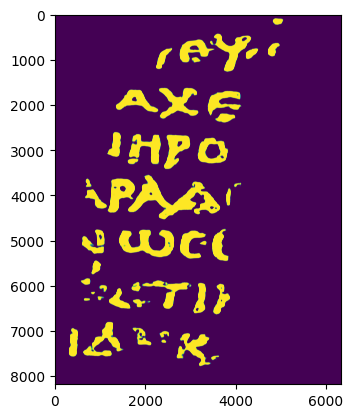

In [47]:
mp = np.nan_to_num(model_pred)
print(mp)
print(mp.min())
print(mp.max())

plt.imshow(mp)
mask_pred_image = mp.astype(float)  # Convert to float first to avoid overflow
mask_pred_image = ((mask_pred_image - mask_pred_image.min()) * 255 / (mask_pred_image.max() - mask_pred_image.min())).astype(np.uint8)
mask_pred_image=Image.fromarray(mask_pred_image)
mask_pred_image.save(output_filename)